In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Diabetes is considered as one of the deadliest and chronic diseases which causes an increase in blood sugar. Many complications occur if diabetes remains untreated and unidentified. The tedious identifying process results in visiting of a patient to a diagnostic center and consulting doctor. But the rise in machine learning approaches solves this critical problem.

In [2]:
df = pd.read_csv('/content/diabetes(1).csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Handle Null value


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data visualization

In [5]:
w = df['Outcome'].value_counts()
print(w.index)
print(w.values)
w = pd.DataFrame(w)
print(w)

Int64Index([0, 1], dtype='int64')
[500 268]
   Outcome
0      500
1      268


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


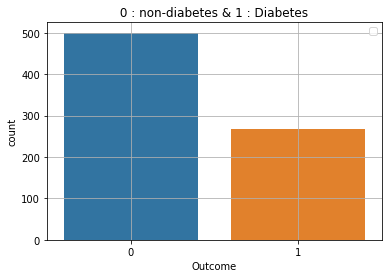

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


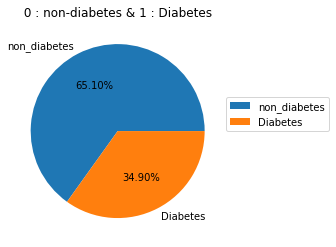

In [6]:
sns.countplot(df['Outcome'])
plt.grid()
plt.legend()
plt.title(' 0 : non-diabetes & 1 : Diabetes ')
plt.show()
print(' ')
plt.pie(w,labels=['non_diabetes','Diabetes'],autopct='%.2f%%')
plt.legend(loc=(1,0.5))
plt.title(' 0 : non-diabetes & 1 : Diabetes ')
plt.show()

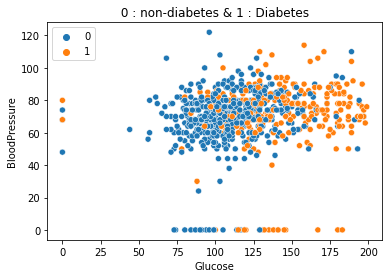

In [7]:
sns.scatterplot(x=df['Glucose'],y=df['BloodPressure'],hue=df['Outcome'])
plt.legend()
plt.title(' 0 : non-diabetes & 1 : Diabetes ')
plt.show()

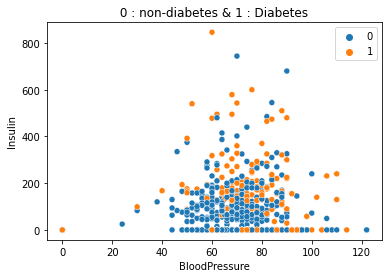

In [8]:
sns.scatterplot(x=df['BloodPressure'],y=df['Insulin'],hue=df['Outcome'])
plt.legend() 
plt.title(' 0 : non-diabetes & 1 : Diabetes ')
plt.show()

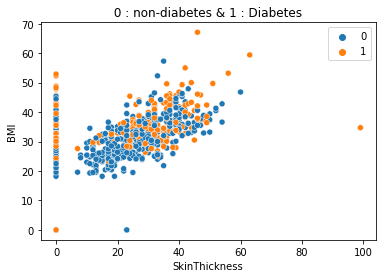

In [9]:
sns.scatterplot(x=df['SkinThickness'],y=df['BMI'],hue=df['Outcome'])
plt.legend() 
plt.title(' 0 : non-diabetes & 1 : Diabetes ')
plt.show()

Replace all the 0 values present in Glucose, BloodPressure, SkinThickness, Insulin and BMI columns with their mean respectively

In [10]:
df['Insulin'] = df['Insulin'].replace({0:df['Insulin'].mean()})
df['Glucose'] = df['Glucose'].replace({0:df['Glucose'].mean()})
df['BloodPressure'] = df['BloodPressure'].replace({0:df['BloodPressure'].mean()})
df['SkinThickness'] = df['SkinThickness'].replace({0:df['SkinThickness'].mean()})
df['BMI'] = df['BMI'].replace({0:df['BMI'].mean()})

Considering all the columns as independent features and the 'Outcome' column as dependent feature, split the dataset into training and testing dataset with test size 25%

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [14]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [18]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
12,10,139.0,80.0,20.536458,79.799479,27.1,1.441,57
306,10,161.0,68.0,23.000000,132.000000,25.5,0.326,47
613,6,105.0,80.0,28.000000,79.799479,32.5,0.878,26
420,1,119.0,88.0,41.000000,170.000000,45.3,0.507,26
593,2,82.0,52.0,22.000000,115.000000,28.5,1.699,25


In [19]:
y_test.head()

316    0
58     0
595    1
330    0
26     1
Name: Outcome, dtype: int64

Apply KNN and predict the 'Outcome' column for testing dataset

In [16]:
from sklearn.neighbors import KNeighborsClassifier

[0.2170138888888889, 0.2204861111111111, 0.2204861111111111, 0.22569444444444445, 0.21875, 0.2152777777777778, 0.22743055555555555, 0.21354166666666666, 0.22916666666666666, 0.22743055555555555, 0.2309027777777778, 0.22569444444444445, 0.234375, 0.22743055555555555, 0.22916666666666666, 0.22569444444444445, 0.2309027777777778, 0.2326388888888889, 0.24131944444444445, 0.2309027777777778, 0.2326388888888889, 0.2309027777777778, 0.22916666666666666, 0.234375, 0.22916666666666666, 0.234375, 0.2361111111111111, 0.23958333333333334, 0.2378472222222222, 0.234375, 0.24131944444444445, 0.24131944444444445, 0.24305555555555555, 0.23958333333333334, 0.24479166666666666, 0.24305555555555555, 0.2586805555555556, 0.25, 0.2586805555555556, 0.2517361111111111, 0.2517361111111111, 0.2534722222222222, 0.2604166666666667, 0.24305555555555555, 0.2482638888888889, 0.2465277777777778, 0.24479166666666666, 0.24305555555555555, 0.2465277777777778, 0.2378472222222222, 0.24479166666666666, 0.2378472222222222, 0

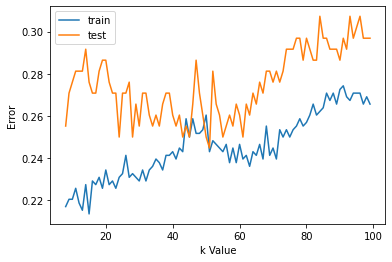

In [52]:
# plt.figure(figsize(10,5))
error1= []
error2= []
for k in range(8,100):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(8,100),error1,label="train")
plt.plot(range(8,100),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
print(error1)
print(error2)
plt.show()

In [53]:
knn = KNeighborsClassifier(n_neighbors=51)

In [54]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=51, p=2,
                     weights='uniform')

In [55]:
print('Training Accuracy',knn.score(x_train,y_train))
print('Testing Accuracy',knn.score(x_test,y_test))

Training Accuracy 0.7569444444444444
Testing Accuracy 0.7552083333333334


In [57]:
y_pred = knn.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [59]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[109  15]
 [ 32  36]]


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       124
           1       0.71      0.53      0.61        68

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



In [63]:
accuracy_score(y_test,y_pred)

0.7552083333333334